# Plot the error ellipse for a given $2 \times 2$ covariance matrix

## Derive formulas for eigenvalues and eigenvectors of the covariance matrix with sympy

In [8]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from IPython.display import display, Latex, Math

In [9]:
c00, c11, c01 = symbols("c00, c11, c01", real=True)
# M = Matrix([[c00, 0], [0, c11]])
M = Matrix([[c00, c01], [c01, c11]])
M

Matrix([
[c00, c01],
[c01, c11]])

In [10]:
v = M.eigenvects()
for result in v:
    eigenvec = simplify(result[2][0])
    display(Math('\mathrm{Eigenvalue:} ' + latex(result[0]) + ', \mathrm{eigenvector:}' + latex(eigenvec)))
    

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Define a function that plots the error ellipse
### Variant 1: Eigenvalues and eigenvectors calculated from formulas obtained with sympy

In [11]:
def error_ellipse_1(cov, center, nstd, **kwargs):
    """
    return error ellipse patch representing the covariance matrix
    cov: 2x2 covariance matrix
    centre: mean values (mu1, mu2)
    nstd: number of standard deviations
    """
    
    # eigenvalues and eigenvectors of the covariance matrix
    if (np.isclose(cov[0][1], 0)):
        eigvals = np.array([cov[0][0], cov[1][1]])
        eigvecs = np.array([[1, 0], [0, 1]])
    else:
        root = np.sqrt(cov[0][0]**2 + cov[1][1]**2  - 2 * cov[0][0] * cov[1][1] + 4 * cov[0][1]**2)
        eigvals = np.array([0.5 * (cov[0][0] + cov[1][1] + root), 0.5 * (cov[0][0] + cov[1][1] - root)])
        eigvecs = np.array([[cov[0][0] - cov[1][1] + root, 2 * cov[0][1]], 
                            [cov[0][0] - cov[1][1] - root, 2 * cov[0][1]]])
    
    # sort eigenvalues and eigenvectors in ascending order
    index = np.argsort(eigvals)
    eigvals, eigvecs = eigvals[index], eigvecs[index]
    
    # angle of the ellipse: angle of eigenvector corresponding to larger eigenvalue    
    theta = np.arctan2(eigvecs[1][1], eigvecs[1][0])
    
    # diameters of the ellipse
    height, width = 2 * nstd * np.sqrt(eigvals)
    
    return Ellipse(xy=center, width=width, height=height,
                   angle=np.degrees(theta), **kwargs)

### Variant 2: Eigenvalues and eigenvectors calculated with numpy functions

In [12]:
def error_ellipse_2(cov, center, nstd, **kwargs):
    """
    return error ellipse patch representing the covariance matrix
    cov: 2x2 covariance matrix
    centre: mean values (mu1, mu2)
    nstd: number of standard deviations
    """

    # eigenvalues and eigenvectors of the covariance matrix
    # (in ascending order of the eigenvalue)
    eigvals, eigvecs = np.linalg.eigh(cov)
   
    # x, y component of the eigenvector (eigvecs[:,1]) with the larger eigenvalue
    x, y = eigvecs[:,1][0], eigvecs[:,1][1]
    
    # angle of the ellipse    
    theta = np.arctan2(y, x)
    
    # width = 2 times radius in x, height = 2 times radius in y 
    height, width = 2 * nstd * np.sqrt(eigvals)
        
    return Ellipse(xy=center, width=width, height=height,
                   angle=np.degrees(theta), **kwargs)

## Example

In [13]:
# define mean values and a covariance matrix
a, b = 0., 0.
V = np.array([[1**2, -0.8], [-0.8, 1**2]])
print(V)

[[ 1.  -0.8]
 [-0.8  1. ]]


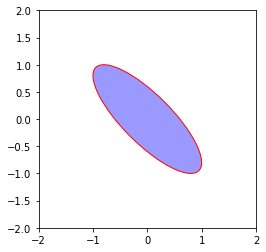

In [14]:
fig, ax = plt.subplots()

# check that both functions return the same error ellipse
el1 = error_ellipse_1(V, (a, b), 1, fc='blue', alpha=0.4)
el2 = error_ellipse_2(V, (a, b), 1, edgecolor='r', fc='None')

ax.add_artist(el1)
ax.add_artist(el2)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect(1)
plt.show()